# Dependencies

In [223]:
import numpy  as np
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt 

from collections import defaultdict
# from RandomForest import *

# Hypers

In [224]:
fname = "./dat-optdigits/optdigits.all"
LOG = True
n_feature = 64
n_class = 10
epsilon = 0.00000001

# Loading Data

In [225]:
def load_data(fname, shuffle=True):
    # read in, df to nparray
    df = pd.read_csv(fname, header=None)
    npd = np.array(df)
    n = npd.shape[0]
    
    # tag to id, id to tag, transform
    if(type(npd[0][-1]) != np.int64):
        if LOG:
            print("converting NaN tag to int label")
        tag_map = defaultdict(int)
        tag_to_id = defaultdict(int)
        id_to_tag = defaultdict(int)
        for d in npd:
            tag_map[d[-1]] += 1

        cnt = 0
        for k, v in tag_map.items():
            id_to_tag[cnt] = k
            tag_to_id[k] = cnt
            cnt += 1

        for i in range(n):
            npd[i][-1] = tag_to_id[npd[i][-1]]
    else:
        tag_to_id = None 
        id_to_tag = None
    
    if shuffle:
        np.random.shuffle(npd)
    
    return npd[:,:-1], npd[:,-1], tag_to_id, id_to_tag

In [275]:
dat = load_data(fname)
# print(len(dat))
X, y, tag2id, id2tag = dat
n = X.shape[0]
tag2id == None
print(n)

5620


In [276]:
## basic usage
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = RandomForestClassifier(n_estimators= 10)
model.fit(Xtrain, ytrain)
ypred_t = model.predict(Xtrain)
ypred = model.predict(Xtest)
print((metrics.classification_report(ypred_t, ytrain)))
print((metrics.classification_report(ypred, ytest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       406
           2       1.00      1.00      1.00       417
           3       1.00      1.00      1.00       426
           4       1.00      1.00      1.00       422
           5       1.00      1.00      1.00       416
           6       1.00      1.00      1.00       418
           7       1.00      1.00      1.00       440
           8       1.00      1.00      1.00       415
           9       1.00      1.00      1.00       445

    accuracy                           1.00      4215
   macro avg       1.00      1.00      1.00      4215
weighted avg       1.00      1.00      1.00      4215

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       145
           1       0.99      0.95      0.97       172
           2       0.98      0.99      0.99       137
           3       0.97 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


predict = 1 ,label = 3
predict = 3 ,label = 2
predict = 1 ,label = 8
predict = 8 ,label = 0
predict = 3 ,label = 9


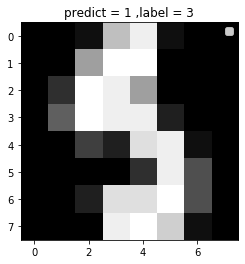

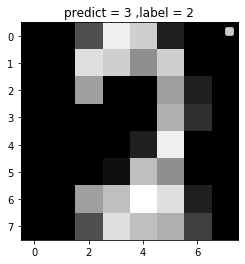

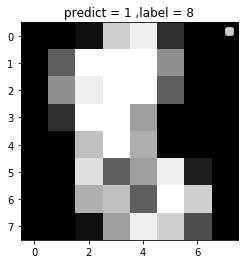

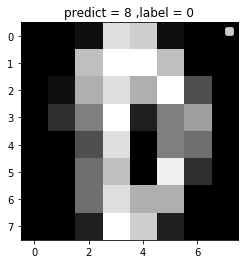

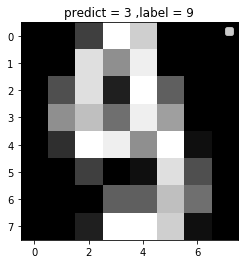

In [313]:
n_miss = len(ypred[ypred!=ytest])
misses = np.array([Xtest[ypred!=ytest], Xtest[ypred!=ytest], Xtest[ypred!=ytest]]).swapaxes(0, 1).swapaxes(1, 2).reshape(n_miss,8,8,3)/16
pre = ypred[ypred!=ytest]
tar = ytest[ypred!=ytest]
from matplotlib import interactive
interactive(True)
for i in range(5):
    #print(misses[i].shape)
    plt.figure()
    msg = "predict = " +  str(pre[i]) +  " ,label = " + str(tar[i])
    plt.title(msg)
    plt.imshow(misses[i], interpolation='nearest')
    plt.legend()
    print(msg)
interactive(False)

In [278]:
ypred!=ytest

array([False, False, False, ..., False,  True, False])

# Experiements

## Train Test Split

In [207]:
exp1_dat2 = np.zeros((101))
for i in range(1,10):
    n = X.shape[0]
    train_percentage = i*0.1 # val from 0.01 to 0.99
    
    #summation = 0.0
    test_time = 10
    for tt in range(test_time):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, test_size=1-train_percentage)
        model = LogisticRegression(solver="liblinear", multi_class="ovr")
        model.fit(Xtrain, ytrain)
        exp1_dat2[i] += metrics.f1_score(model.predict(Xtest), ytest, average='weighted')
    exp1_dat2[i] /= test_time

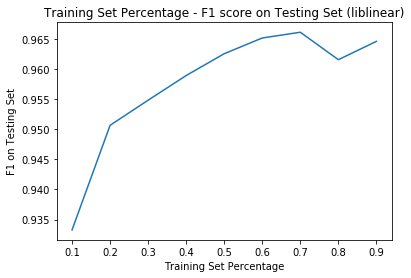

In [210]:
plt.title('Training Set Percentage - F1 score on Testing Set (liblinear)')
plt.xlabel('Training Set Percentage')
plt.ylabel('F1 on Testing Set')
plt.plot(0.1*np.array(list(range(1,10))), exp1_dat2[1:10])

In [215]:
exp1_dat = np.zeros((101))
for i in range(1,100):
    n = X.shape[0]
    train_percentage = i*0.01 # val from 0.01 to 0.99
    
    test_time = 10
    for tt in range(test_time):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, test_size=1-train_percentage)
        model = RandomForestClassifier(n_estimators=10)
        model.fit(Xtrain, ytrain)
        exp1_dat[i] += metrics.f1_score(model.predict(Xtest), ytest, average='weighted')
    exp1_dat[i] /= test_time

562.0


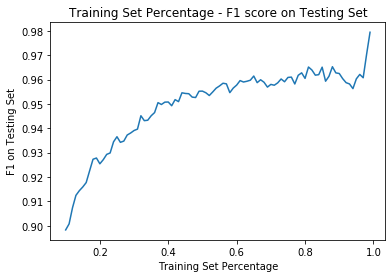

In [229]:
plt.title('Training Set Percentage - F1 score on Testing Set')
plt.xlabel('Training Set Percentage')
plt.ylabel('F1 on Testing Set')
plt.plot(0.01*np.array(range(10,100)), exp1_dat[10:100])
print(n*0.1)

## # of Tree-F1

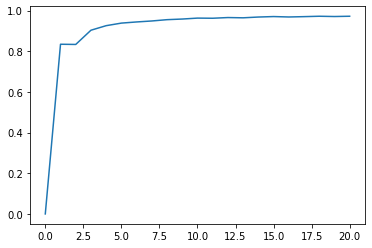

In [168]:
exp2_dat = np.zeros((2,21))
for i in range(1,21,1):
    n = X.shape[0]
    val = i
    train_percentage = 0.8
    
    test_time = 10
    summation = 0.0
    for tt in range(test_time):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, test_size=1-train_percentage)
        model = RandomForestClassifier(n_estimators=val)
        model.fit(Xtrain, ytrain)
        summation += metrics.f1_score(model.predict(Xtest), ytest, average='weighted')
    exp2_dat[0][i] = val
    exp2_dat[1][i] = summation/test_time

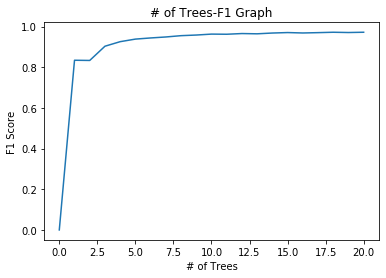

In [170]:
plt.title('# of Trees-F1 Graph')
plt.xlabel('# of Trees')
plt.ylabel('F1 Score')
plt.plot(exp2_dat[0], exp2_dat[1])

In [235]:
exp2_dat1 = np.zeros((2,21))
test_list22 = [1, 5, 10, 50, 100, 200, 500, 750, 1000]
for i in range(len(test_list22)):
    n = X.shape[0]
    val = test_list22[i]
    train_percentage = 0.8
    
    test_time = 10
    summation = 0.0
    for tt in range(test_time):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, test_size=1-train_percentage)
        model = RandomForestClassifier(n_estimators=val)
        model.fit(Xtrain, ytrain)
        summation += metrics.f1_score(model.predict(Xtest), ytest, average='weighted')
    exp2_dat1[0][i] = np.log(val)
    exp2_dat1[1][i] = summation/test_time

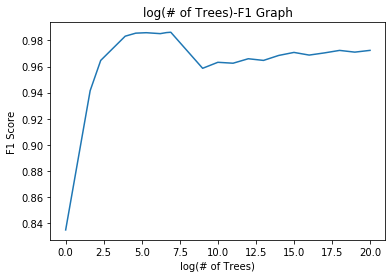

In [236]:
plt.title('log(# of Trees)-F1 Graph')
plt.xlabel('log(# of Trees)')
plt.ylabel('F1 Score')
plt.plot(exp2_dat1[0], exp2_dat1[1])

## Criterion (Gini, Entropy)

In [242]:
exp3_dat1 = np.zeros((3,30))
test_list3 = [1, 5, 10, 15, 20]
for i in range(len(test_list3)):
    n = X.shape[0]
    val = test_list3[i]
    train_percentage = 0.8
    
    test_time = 10
    summation1 = 0.0
    summation2 = 0.0
    for tt in range(test_time):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, test_size=1-train_percentage)
        model1 = RandomForestClassifier(n_estimators=val, criterion="gini")
        model1.fit(Xtrain, ytrain)
        model2 = RandomForestClassifier(n_estimators=val, criterion="entropy")
        model2.fit(Xtrain, ytrain)
        summation1 += metrics.f1_score(model1.predict(Xtest), ytest, average='weighted')
        summation2 += metrics.f1_score(model2.predict(Xtest), ytest, average='weighted')
    exp3_dat1[0][i] = val
    exp3_dat1[1][i] = summation1/test_time
    exp3_dat1[2][i] = summation2/test_time

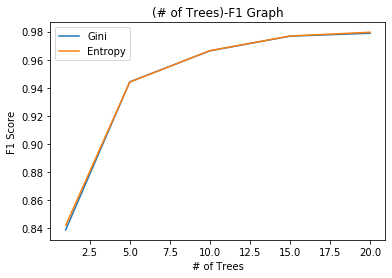

In [248]:
plt.title('(# of Trees)-F1 Graph')
plt.xlabel('# of Trees')
plt.ylabel('F1 Score')
plt.plot(exp3_dat1[0][0:5], exp3_dat1[1][0:5], label='Gini')
plt.plot(exp3_dat1[0][0:5], exp3_dat1[2][0:5], label='Entropy')
plt.legend()

## Early Cut - Depth

In [256]:
exp4_dat1 = np.zeros((2,105))
test_list4 = list(range(1,101))
for i in range(len(test_list4)):
    n = X.shape[0]
    val = test_list4[i]
    train_percentage = 0.8
    
    test_time = 10
    summation1 = 0.0
    for tt in range(test_time):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, test_size=1-train_percentage)
        model1 = RandomForestClassifier(n_estimators=10, criterion="gini", max_depth=val)
        model1.fit(Xtrain, ytrain)
        summation1 += metrics.f1_score(model1.predict(Xtest), ytest, average='weighted')
    exp4_dat1[0][i] = val
    exp4_dat1[1][i] = summation1/test_time

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined an

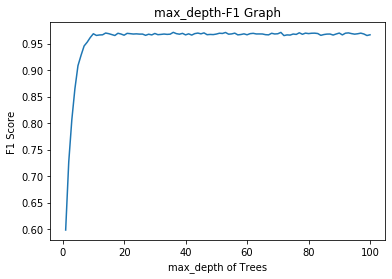

In [259]:
plt.title('max_depth-F1 Graph')
plt.xlabel('max_depth of Trees')
plt.ylabel('F1 Score')
plt.plot(exp4_dat1[0][0:len(test_list4)], exp4_dat1[1][0:len(test_list4)])

In [ ]:
#### Random Trials on sk learn, Confusion Matrix and Precision Recalls
#metrics.confusion_matrix(ypred, ytest)
#metrics.precision_recall_fscore_support(ypred, ytest)

## Early Cut - min_samples_split

In [263]:
exp5_dat1 = np.zeros((2,55))
test_list5 = list(range(2,500, 10))
for i in range(len(test_list5)):
    n = X.shape[0]
    val = test_list5[i]
    train_percentage = 0.8
    
    test_time = 10
    summation1 = 0.0
    for tt in range(test_time):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, test_size=1-train_percentage)
        model1 = RandomForestClassifier(n_estimators=10, criterion="gini", min_samples_split=val)
        model1.fit(Xtrain, ytrain)
        summation1 += metrics.f1_score(model1.predict(Xtest), ytest, average='weighted')
    exp5_dat1[0][i] = val
    exp5_dat1[1][i] = summation1/test_time

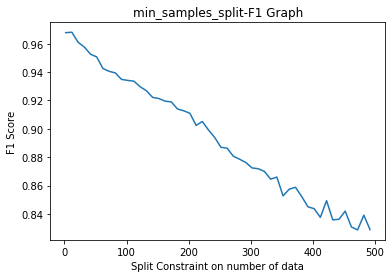

In [265]:
plt.title('min_samples_split-F1 Graph')
plt.xlabel('Split Constraint on number of data')
plt.ylabel('F1 Score')
plt.plot(exp5_dat1[0][0:len(test_list5)], exp5_dat1[1][0:len(test_list5)])

## Min Impurity Decrease

In [273]:
exp6_dat1 = np.zeros((2,55))
test_list6 = 0.001 * np.array(list(range(1, 50, 1)))
for i in range(len(test_list6)):
    n = X.shape[0]
    val = test_list6[i]
    train_percentage = 0.8
    
    test_time = 10
    summation1 = 0.0
    for tt in range(test_time):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, test_size=1-train_percentage)
        model1 = RandomForestClassifier(n_estimators=10, criterion="gini", min_impurity_decrease=val)
        model1.fit(Xtrain, ytrain)
        summation1 += metrics.f1_score(model1.predict(Xtest), ytest, average='weighted')
    exp6_dat1[0][i] = val
    exp6_dat1[1][i] = summation1/test_time

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined an

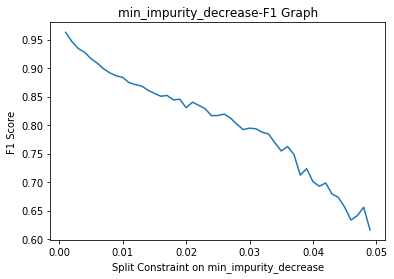

In [274]:
plt.title('min_impurity_decrease-F1 Graph')
plt.xlabel('Split Constraint on min_impurity_decrease')
plt.ylabel('F1 Score')
plt.plot(exp6_dat1[0][0:len(test_list6)], exp6_dat1[1][0:len(test_list6)])